import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from scipy.stats import mode, zscore
from copy import copy
from pprint import pprint

flatten = lambda l : [item for sublist in l for item in sublist]


In [2]:
# a. Load the Dataset using Pandas
orig_t_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Titanic_Data.csv')
t_df = copy(orig_t_df)

In [3]:
t_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q
313,314,0,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
592,593,0,3,"Elsbury, Mr. William James",male,47.0,0,0,A/5 3902,7.2500,NaN,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S


In [4]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# b. Remove the column with more than 50% missing values. (if there)
for _c in t_df.columns:
    prop_na=t_df[_c].isna().sum()/t_df[_c].__len__()
    print(f"{_c}, {prop_na}")
    if prop_na >.5:
        t_df.drop(_c, axis=1, inplace=True)
        print(f'\ndropped {_c}\n')
t_df.columns

PassengerId, 0.0
Survived, 0.0
Pclass, 0.0
Name, 0.0
Sex, 0.0
Age, 0.19865319865319866
SibSp, 0.0
Parch, 0.0
Ticket, 0.0
Fare, 0.0
Cabin, 0.7710437710437711

dropped Cabin

Embarked, 0.002244668911335578


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [6]:
# c. Create a function to detect outliers. Apply it to columns Age, SibSp, Parch, Fare using apply function.

def find_outlier(df):
    q1=df.quantile(.25)
    q3=df.quantile(.75)
    
    iqr=q3-q1
    min_range = q1 - 1.5*iqr
    max_range = q3 + 1.5*iqr
    outliers_ixs = list(df.index[ (df < min_range) | (df > max_range) ])
    #outliers_ixs = list(df.loc[ (df < min_range) | (df > max_range) ])
    outliers_vals = list(df[outliers_ixs])
    
    return outliers_ixs, outliers_vals



In [7]:
outliers = t_df[['Age', 'SibSp', 'Parch', 'Fare']].apply(find_outlier, axis=0)
outliers= outliers.transpose()
outliers.columns=['ixs', 'vals']
# outliers= outliers.transpose()
outliers

,ixs,vals
Age,"[33, 54, 96, 116, 280, 456, 493, 630, 672, 745...","[66.0, 65.0, 71.0, 70.5, 65.0, 65.0, 71.0, 80...."
SibSp,"[7, 16, 24, 27, 50, 59, 63, 68, 71, 85, 88, 11...","[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, ..."
Parch,"[7, 8, 10, 13, 16, 24, 25, 27, 43, 50, 54, 58,...","[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, ..."
Fare,"[1, 27, 31, 34, 52, 61, 62, 72, 88, 102, 118, ...","[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 8..."


In [8]:


print(f'len(t_df) before drop outliers: {len(t_df)}')

t_df.drop(flatten(outliers['ixs']), axis=0, inplace=True)

print(f'len(t_df) after drop outliers: {len(t_df)}')

len(t_df) before drop outliers: 891
len(t_df) after drop outliers: 598


In [9]:
# d. Find correlation between all features.
# from sklearn import linear_model

"""***from Slack***
Dongli Wu  2:17 PM
Please skip this one. Its something not covered yet
2:17
Hi team, please skip problem 1.d.  Thanks

"""

'***from Slack***\nDongli Wu  2:17 PM\nPlease skip this one. Its something not covered yet\n2:17\nHi team, please skip problem 1.d.  Thanks\n\n'

In [10]:
# e. Replace missing values using strategies – dropna, fillna or impute by mean or median.


fillna_by_mean = lambda s0: s0.fillna(np.mean(s0))
fillna_by_median = lambda s1: s1.fillna(np.median(s1))
fillna_by_mode = lambda s2: s2.fillna(mode(s2))

# np.nan in fillna_by_median(t_df['Age']) # seeing NaN in outputs for this!!!


imputer_mean = SimpleImputer(strategy = 'mean')
imputer_median = SimpleImputer(strategy = 'median')
imputer_mode = SimpleImputer(strategy = 'mode')


t_df['Age'] = t_df['Age'].transform(fillna_by_median)

print("s.isna().sum :\n")
for _c in t_df.columns:
    print(f"{_c} : {t_df[_c].isna().sum()}")
         


s.isna().sum :

PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 149
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Embarked : 0


In [11]:
# f. Create an impute function orig_t_df and replace all age missing values associated with its Pclass.
    # Use apply () function to apply the user declared function and make changes.
t_df['Age'] = copy(orig_t_df['Age'])
    
print(f"'Age .isna().sum() before imputing' : {t_df['Age'].isna().sum()}")    
display(t_df['Age'].describe())
    
    


t_df['Age'] = t_df.groupby('Pclass')['Age'].transform(lambda grp:grp.fillna(np.mean(grp)))


print(f"Age .isna().sum() after imputing : {t_df['Age'].isna().sum()}")
display(t_df['Age'].describe())


'Age .isna().sum() before imputing' : 149


count    449.000000
mean      31.121381
std       11.473877
min        5.000000
25%       22.000000
50%       29.000000
75%       37.000000
max       64.000000
Name: Age, dtype: float64

Age .isna().sum() after imputing : 0


count    598.000000
mean      30.781991
std       10.268239
min        5.000000
25%       25.000000
50%       27.330769
75%       36.000000
max       64.000000
Name: Age, dtype: float64

In [12]:
# g. Apply encoding to the categorical values

for _c in ["Sex", "Embarked", "Pclass"]:
    print(f"{_c}\n{t_df[_c].unique()}\n\n")

t_df['Pclass_str']= t_df['Pclass'].astype('str')
s_d = pd.get_dummies(t_df[['Sex', 'Pclass_str', "Embarked"]])
s_d
t_df = pd.concat([t_df, s_d], axis=1)
t_df





# from sklearn.preprocessing import LabelBinarizer
################
# Perhaps this should be done with only one LabelBinarizer?
################
# encoder_sex = LabelBinarizer()
# encoder_embarked = LabelBinarizer()
# encoder_pclass = LabelBinarizer()
# t_df['Sex_coded'] = pd.Series(list(encoder_sex.fit_transform(t_df['Sex'])))
# t_df['Embarked_coded'] = pd.Series(list(encoder_embarked.fit_transform(t_df['Embarked'])))
# t_df['Pclass_coded'] = pd.Series(list(encoder_pclass.fit_transform(t_df['Pclass'])))
# encoder_pclass.classes_

Sex
['male' 'female']


Embarked
['S' 'Q' 'C']


Pclass
[3 1 2]




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_str,Sex_female,Sex_male,Pclass_str_1,Pclass_str_2,Pclass_str_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,3,0,1,0,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,3,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,1,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,3,0,1,0,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",male,27.330769,0,0,330877,8.4583,Q,3,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,S,3,0,1,0,0,1,0,0,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,2,0,1,0,1,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,1,0,1,0,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,0,1,1,0,0,1,0,0


0    420
1    178
Name: Survived, dtype: int64

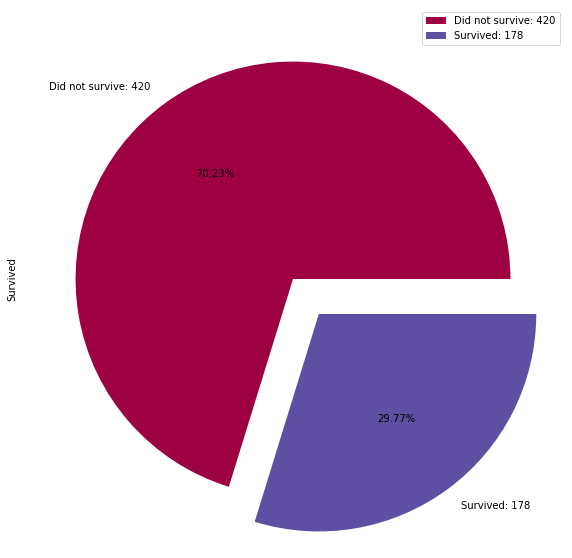

In [13]:
# h. Count total number of survived and not survived and create a Pie Chart displaying % of survived and not survived.
surv_pc_vals=t_df['Survived'].value_counts()
display(surv_pc_vals)
ax0 = t_df['Survived'].value_counts().plot.pie(labels=[f'Did not survive: {surv_pc_vals[0]}', f'Survived: {surv_pc_vals[1]}'], autopct='%1.2f%%', explode=[0, .2], cmap='Spectral', figsize=(16,10))
ax0.legend()

In [14]:
# i. Count total number of Male and Female survived and Not Survived from Titanic Dataset.
display(t_df.groupby('Sex')['Survived'].value_counts())





Sex     Survived
female  1           106
        0            41
male    0           379
        1            72
Name: Survived, dtype: int64

In [15]:
# j. Count total number of people survived from each Pclass (Passenger Class).
display(t_df.groupby('Pclass')['Survived'].value_counts())

Pclass  Survived
1       0            49
        1            46
2       0            79
        1            47
3       0           292
        1            85
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Pclass'>

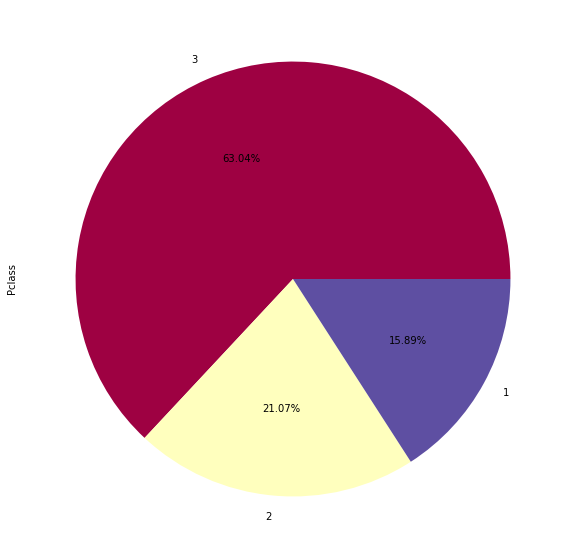

In [16]:
# k. Create a Pie Chart showing % of passengers travelling in each Class. 

pc_vals = t_df['Pclass'].value_counts()

pc_vals.plot.pie(autopct='%1.2f%%', cmap='Spectral', figsize=(16,10))

In [17]:
# print(clean_namespace(early_namespace, dir()))

In [18]:
# 2. BUILDING PERMITS
# Perform the Data Cleaning for using Building Permits dataset.
# a. Load the Dataset using Pandas
permits_data_path = r'C:\Users\emmam\Documents\nlb\data\Building_Permits.csv'

bp_df = pd.read_csv(permits_data_path)
bp_df.info()


C:\Users\emmam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

In [19]:
# b. Remove the column with more than 50% missing values. (if there)
# help(filter)

display(f"df shape:{ bp_df.shape}")
gt50_nan_cols=list()

for _c in bp_df.columns:
    _sum = bp_df[_c].isna().sum()/len(bp_df)

    if _sum > .5:
            gt50_nan_cols.append((_c, _sum))

print("dropping columns:")            
pprint(gt50_nan_cols)
print("...")
bp_df.drop([c[0] for c in gt50_nan_cols], axis=1, inplace=True)

display(f"df shape:{ bp_df.shape}")


'df shape:(198900, 43)'

dropping columns:
[('Street Number Suffix', 0.98885872297637),
 ('Unit', 0.8517898441427854),
 ('Unit Suffix', 0.9901407742584213),
 ('Completed Date', 0.5113574660633484),
 ('Structural Notification', 0.9651985922574158),
 ('Voluntary Soft-Story Retrofit', 0.9998240321769734),
 ('Fire Only Permit', 0.9053443941679236),
 ('TIDF Compliance', 0.999989944695827),
 ('Site Permit', 0.9730568124685772)]
...


'df shape:(198900, 34)'

In [20]:
# c. Compute the number of missing data points missing per column
missing_data_per_col=list()

for _c in bp_df.columns:
    
    _sum = bp_df[_c].isna().sum()
    _pct= round(_sum/len(bp_df) ,2)
    missing_data_per_col.append((_c, _sum, _pct))


# d. Calculate total percent of data missing.
display("*column name*, *nan vals in column*, *% nan vals*")
display(missing_data_per_col)
i0 = len(bp_df) - len(bp_df.dropna())

display("*********")
display(f"{i0} rows with nan values, {round(i0/len(bp_df),3)} of total")


'*column name*, *nan vals in column*, *% nan vals*'

[('Permit Number', 0, 0.0),
 ('Permit Type', 0, 0.0),
 ('Permit Type Definition', 0, 0.0),
 ('Permit Creation Date', 0, 0.0),
 ('Block', 0, 0.0),
 ('Lot', 0, 0.0),
 ('Street Number', 0, 0.0),
 ('Street Name', 0, 0.0),
 ('Street Suffix', 2768, 0.01),
 ('Description', 290, 0.0),
 ('Current Status', 0, 0.0),
 ('Current Status Date', 0, 0.0),
 ('Filed Date', 0, 0.0),
 ('Issued Date', 14940, 0.08),
 ('First Construction Document Date', 14946, 0.08),
 ('Number of Existing Stories', 42784, 0.22),
 ('Number of Proposed Stories', 42868, 0.22),
 ('Permit Expiration Date', 51880, 0.26),
 ('Estimated Cost', 38066, 0.19),
 ('Revised Cost', 6066, 0.03),
 ('Existing Use', 41114, 0.21),
 ('Existing Units', 51538, 0.26),
 ('Proposed Use', 42439, 0.21),
 ('Proposed Units', 50911, 0.26),
 ('Plansets', 37309, 0.19),
 ('Existing Construction Type', 43366, 0.22),
 ('Existing Construction Type Description', 43366, 0.22),
 ('Proposed Construction Type', 43162, 0.22),
 ('Proposed Construction Type Description'

'*********'

'69433 rows with nan values, 0.349 of total'

In [21]:
# e. Remove all the rows that contain a missing value. Compare original columns and columns dropped after this step.
bp_df_dropdna= bp_df.dropna(axis=0)


for _c in bp_df.columns:
    display(bp_df[_c].describe(), bp_df_dropdna[_c].describe(), "*"*40)




count           198900
unique          181495
top       201602179765
freq               101
Name: Permit Number, dtype: object

count           129467
unique          117633
top       201602179758
freq                66
Name: Permit Number, dtype: object

'****************************************'

count    198900.000000
mean          7.522323
std           1.457451
min           1.000000
25%           8.000000
50%           8.000000
75%           8.000000
max           8.000000
Name: Permit Type, dtype: float64

count    129467.000000
mean          7.695050
std           1.196584
min           2.000000
25%           8.000000
50%           8.000000
75%           8.000000
max           8.000000
Name: Permit Type, dtype: float64

'****************************************'

count                     198900
unique                         8
top       otc alterations permit
freq                      178844
Name: Permit Type Definition, dtype: object

count                     129467
unique                         3
top       otc alterations permit
freq                      121571
Name: Permit Type Definition, dtype: object

'****************************************'

count         198900
unique          1291
top       09/15/2017
freq             413
Name: Permit Creation Date, dtype: object

count         129467
unique          1289
top       11/03/2015
freq             332
Name: Permit Creation Date, dtype: object

'****************************************'

count     198900
unique      4896
top         3708
freq        1195
Name: Block, dtype: object

count     129467
unique      4755
top         3708
freq         848
Name: Block, dtype: object

'****************************************'

count     198900
unique      1055
top          001
freq       10114
Name: Lot, dtype: object

count     129467
unique       992
top          001
freq        5800
Name: Lot, dtype: object

'****************************************'

count    198900.000000
mean       1121.728944
std        1135.768948
min           0.000000
25%         235.000000
50%         710.000000
75%        1700.000000
max        8400.000000
Name: Street Number, dtype: float64

count    129467.000000
mean       1107.775580
std        1134.983883
min           1.000000
25%         230.000000
50%         686.000000
75%        1661.000000
max        8400.000000
Name: Street Number, dtype: float64

'****************************************'

count     198900
unique      1704
top       Market
freq        5443
Name: Street Name, dtype: object

count     129467
unique      1618
top       Market
freq        3500
Name: Street Name, dtype: object

'****************************************'

count     196132
unique        21
top           St
freq      138358
Name: Street Suffix, dtype: object

count     129467
unique        21
top           St
freq       88367
Name: Street Suffix, dtype: object

'****************************************'

count           198610
unique          134272
top       street space
freq             22163
Name: Description, dtype: object

count        129467
unique       104924
top       reroofing
freq           8890
Name: Description, dtype: object

'****************************************'

count       198900
unique          14
top       complete
freq         97077
Name: Current Status, dtype: object

count       129467
unique          10
top       complete
freq         86713
Name: Current Status, dtype: object

'****************************************'

count         198900
unique          1307
top       09/15/2017
freq             474
Name: Current Status Date, dtype: object

count         129467
unique          1306
top       06/15/2016
freq             315
Name: Current Status Date, dtype: object

'****************************************'

count         198900
unique          1288
top       09/15/2017
freq             412
Name: Filed Date, dtype: object

count         129467
unique          1288
top       11/03/2015
freq             302
Name: Filed Date, dtype: object

'****************************************'

count         183960
unique          1289
top       06/15/2016
freq             341
Name: Issued Date, dtype: object

count         129467
unique          1289
top       06/15/2016
freq             296
Name: Issued Date, dtype: object

'****************************************'

count         183954
unique          1288
top       11/07/2016
freq             339
Name: First Construction Document Date, dtype: object

count         129467
unique          1288
top       11/07/2016
freq             286
Name: First Construction Document Date, dtype: object

'****************************************'

count    156116.000000
mean          5.705773
std           8.613455
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          78.000000
Name: Number of Existing Stories, dtype: float64

count    129467.000000
mean          5.293484
std           8.023540
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          63.000000
Name: Number of Existing Stories, dtype: float64

'****************************************'

count    156032.000000
mean          5.745043
std           8.613284
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          78.000000
Name: Number of Proposed Stories, dtype: float64

count    129467.000000
mean          5.310747
std           8.023431
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          63.000000
Name: Number of Proposed Stories, dtype: float64

'****************************************'

count         147020
unique          2232
top       02/28/2018
freq             302
Name: Permit Expiration Date, dtype: object

count         129467
unique          1983
top       02/28/2018
freq             275
Name: Permit Expiration Date, dtype: object

'****************************************'

count    1.608340e+05
mean     1.689554e+05
std      3.630386e+06
min      1.000000e+00
25%      3.300000e+03
50%      1.100000e+04
75%      3.500000e+04
max      5.379586e+08
Name: Estimated Cost, dtype: float64

count    1.294670e+05
mean     6.392003e+04
std      7.244466e+05
min      1.000000e+00
25%      3.500000e+03
50%      1.000000e+04
75%      3.000000e+04
max      2.100000e+08
Name: Estimated Cost, dtype: float64

'****************************************'

count    1.928340e+05
mean     1.328562e+05
std      3.584903e+06
min      0.000000e+00
25%      1.000000e+00
50%      7.000000e+03
75%      2.870750e+04
max      7.805000e+08
Name: Revised Cost, dtype: float64

count    1.294670e+05
mean     7.405395e+04
std      7.282236e+05
min      0.000000e+00
25%      4.000000e+03
50%      1.250000e+04
75%      3.900000e+04
max      2.100000e+08
Name: Revised Cost, dtype: float64

'****************************************'

count                157786
unique                   93
top       1 family dwelling
freq                  46766
Name: Existing Use, dtype: object

count                129467
unique                   92
top       1 family dwelling
freq                  42827
Name: Existing Use, dtype: object

'****************************************'

count    147362.000000
mean         15.666164
std          74.476321
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max        1907.000000
Name: Existing Units, dtype: float64

count    129467.000000
mean         15.398405
std          72.724217
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max        1907.000000
Name: Existing Units, dtype: float64

'****************************************'

count                156461
unique                   94
top       1 family dwelling
freq                  46346
Name: Proposed Use, dtype: object

count                129467
unique                   92
top       1 family dwelling
freq                  42223
Name: Proposed Use, dtype: object

'****************************************'

count    147989.000000
mean         16.510950
std          75.220444
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        1911.000000
Name: Proposed Units, dtype: float64

count    129467.000000
mean         15.467053
std          72.782494
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max        1911.000000
Name: Proposed Units, dtype: float64

'****************************************'

count    161591.000000
mean          1.274650
std          22.407345
min           0.000000
25%           0.000000
50%           2.000000
75%           2.000000
max        9000.000000
Name: Plansets, dtype: float64

count    129467.000000
mean          1.150795
std          25.029797
min           0.000000
25%           0.000000
50%           2.000000
75%           2.000000
max        9000.000000
Name: Plansets, dtype: float64

'****************************************'

count    155534.000000
mean          4.072878
std           1.585756
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Existing Construction Type, dtype: float64

count    129467.000000
mean          4.212996
std           1.497191
min           1.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Existing Construction Type, dtype: float64

'****************************************'

count             155534
unique                 5
top       wood frame (5)
freq              113350
Name: Existing Construction Type Description, dtype: object

count             129467
unique                 5
top       wood frame (5)
freq               99582
Name: Existing Construction Type Description, dtype: object

'****************************************'

count    155738.000000
mean          4.089529
std           1.578766
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Proposed Construction Type, dtype: float64

count    129467.000000
mean          4.212633
std           1.497374
min           1.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Proposed Construction Type, dtype: float64

'****************************************'

count             155738
unique                 5
top       wood frame (5)
freq              114382
Name: Proposed Construction Type Description, dtype: object

count             129467
unique                 5
top       wood frame (5)
freq               99563
Name: Proposed Construction Type Description, dtype: object

'****************************************'

count    197183.000000
mean          5.538403
std           2.887041
min           1.000000
25%           3.000000
50%           6.000000
75%           8.000000
max          11.000000
Name: Supervisor District, dtype: float64

count    129467.000000
mean          5.633613
std           2.898954
min           1.000000
25%           3.000000
50%           6.000000
75%           8.000000
max          11.000000
Name: Supervisor District, dtype: float64

'****************************************'

count                             197175
unique                                41
top       Financial District/South Beach
freq                               21816
Name: Neighborhoods - Analysis Boundaries, dtype: object

count                             129467
unique                                41
top       Financial District/South Beach
freq                               13638
Name: Neighborhoods - Analysis Boundaries, dtype: object

'****************************************'

count    197184.000000
mean      94115.500558
std           9.270131
min       94102.000000
25%       94109.000000
50%       94114.000000
75%       94122.000000
max       94158.000000
Name: Zipcode, dtype: float64

count    129467.000000
mean      94115.693011
std           9.047734
min       94102.000000
25%       94109.000000
50%       94115.000000
75%       94122.000000
max       94158.000000
Name: Zipcode, dtype: float64

'****************************************'

count                                      197200
unique                                      57604
top       (37.79226164705184, -122.4034859571375)
freq                                          554
Name: Location, dtype: object

count                                      129467
unique                                      47701
top       (37.79226164705184, -122.4034859571375)
freq                                          403
Name: Location, dtype: object

'****************************************'

count    1.989000e+05
mean     1.162048e+12
std      4.918215e+11
min      1.293532e+10
25%      1.308567e+12
50%      1.371840e+12
75%      1.435000e+12
max      1.498342e+12
Name: Record ID, dtype: float64

count    1.294670e+05
mean     1.175948e+12
std      4.758527e+11
min      1.293532e+10
25%      1.310438e+12
50%      1.368692e+12
75%      1.430051e+12
max      1.498339e+12
Name: Record ID, dtype: float64

'****************************************'

In [22]:
# f. Replace missing values automatically using fillna(), ffill, bfill as required.

# lazy LOSSY implementation
for _c in bp_df.columns:
    bp_df[_c] = bp_df[_c].fillna(method='ffill').fillna(method='bfill')

bp_df.isna().sum()


Permit Number                             0
Permit Type                               0
Permit Type Definition                    0
Permit Creation Date                      0
Block                                     0
Lot                                       0
Street Number                             0
Street Name                               0
Street Suffix                             0
Description                               0
Current Status                            0
Current Status Date                       0
Filed Date                                0
Issued Date                               0
First Construction Document Date          0
Number of Existing Stories                0
Number of Proposed Stories                0
Permit Expiration Date                    0
Estimated Cost                            0
Revised Cost                              0
Existing Use                              0
Existing Units                            0
Proposed Use                    

In [23]:
# g. Apply Datetime format to all columns with Date Name. e.g. Current Status Date, Permit Creation Date etc. Apply to all.

datecols=[s for s in bp_df.columns if 'date' in s.lower()]
bp_df[datecols].info()

for _c in datecols:
    bp_df[_c] = pd.to_datetime(bp_df[_c])
    
bp_df[datecols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 6 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Permit Creation Date              198900 non-null  object
 1   Current Status Date               198900 non-null  object
 2   Filed Date                        198900 non-null  object
 3   Issued Date                       198900 non-null  object
 4   First Construction Document Date  198900 non-null  object
 5   Permit Expiration Date            198900 non-null  object
dtypes: object(6)
memory usage: 9.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 6 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Permit Creation Date              198900 non-null  datetime64[ns]
 1   Current Status Dat

In [24]:
# print(clean_namespace(early_namespace, dir()))

In [25]:
# 3. ADULT.CSV
# Perform the Data Cleaning, Data Preparation using the adult dataset:
# a. Read the adult.csv data
adults_data_path = r'C:\Users\emmam\Documents\nlb\data\adult.csv'

ad_df = pd.read_csv(adults_data_path)

ad_df.sample(10)

display(ad_df.shape)



(32561, 15)

In [26]:

# b. Count the number ‘?’ values in the entire dataset use str.contains()

questionmark_map = ad_df.applymap(lambda s : str(s).__contains__("?"))#.sum().sum()

questionmark_map_ttl_sum = questionmark_map.sum().sum()

display("*"*20,f"Total '?' cells in dataset: {questionmark_map_ttl_sum}","*"*20)


'********************'

"Total '?' cells in dataset: 4262"

'********************'

In [27]:

# c. Replace all ‘?’ with null values. Check the total number of null values in each column

display(f"nans before '?' replacement", ad_df.isna().sum())

ad_df[questionmark_map]=np.nan

display(f"nans after '?' replacement", ad_df.isna().sum())


"nans before '?' replacement"

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

"nans after '?' replacement"

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [28]:
# d. Replace missing values automatically using fillna(), ffill, bfill, replace by using mean, median.

categorical_cols = ['workclass','occupation', 'native.country']

for _c in categorical_cols:
    ad_df[_c].fillna(mode(ad_df[_c]).mode[0], inplace=True)

display(f"nans after fillna", ad_df.isna().sum())


'nans after fillna'

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [29]:
# e. Remove all the rows that contain a missing value. Compare original columns and columns dropped after this step. 

o_ad_df = pd.read_csv(adults_data_path)
o_ad_df[questionmark_map]=np.nan
display(o_ad_df.isna().sum())
o_ad_df.dropna(axis=0, inplace=True)
               

for _c in ['workclass', 'occupation', 'native.country']:
    display(ad_df[_c].describe(), o_ad_df[_c].describe(), "*"*40)



age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

count       32561
unique          8
top       Private
freq        24532
Name: workclass, dtype: object

count       30162
unique          7
top       Private
freq        22286
Name: workclass, dtype: object

'****************************************'

count              32561
unique                14
top       Prof-specialty
freq                5983
Name: occupation, dtype: object

count              30162
unique                14
top       Prof-specialty
freq                4038
Name: occupation, dtype: object

'****************************************'

count             32561
unique               41
top       United-States
freq              29753
Name: native.country, dtype: object

count             30162
unique               41
top       United-States
freq              27504
Name: native.country, dtype: object

'****************************************'

In [86]:
# Use Boston data and check for outliers:
# https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/boston_train.csv
# https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/boston_test.csv

# a. Read both the dataset using pandas and merge both the datasets and combine them to create single new dataset.

btr_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/boston_train.csv')
bts_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/boston_test.csv')
b_df = pd.concat([btr_df, bts_df], axis=0)
b_df.sample(10)


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
10,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273,21.0,23.9
277,0.07978,40.0,6.41,0.447,6.482,32.1,4.1403,254,17.6,29.1
8,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222,18.7,36.2
130,0.49298,0.0,9.90,0.544,6.635,82.5,3.3175,304,18.4,22.8
80,0.29090,0.0,21.89,0.624,6.174,93.6,1.6119,437,21.2,14.0
392,18.49820,0.0,18.10,0.668,4.138,100.0,1.1370,666,20.2,13.8
174,6.44405,0.0,18.10,0.584,6.425,74.8,2.2004,666,20.2,16.1
56,12.24720,0.0,18.10,0.584,5.837,59.7,1.9976,666,20.2,10.2
11,0.05479,33.0,2.18,0.472,6.616,58.1,3.3700,222,18.4,28.4
396,0.04560,0.0,13.89,0.550,5.888,56.0,3.1121,276,16.4,23.3


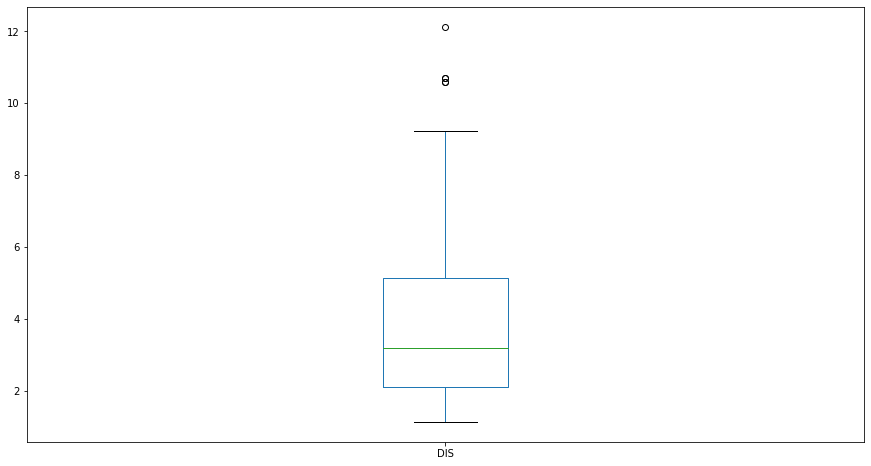

In [40]:
# b. Discover outliers with visualization boxplot using DIS, MEDV, AGE, TAX.

# ax00= b_df[['DIS','MEDV','AGE','TAX']].plot.box()

ax0 = b_df['DIS'].plot.box(figsize=(15,8))


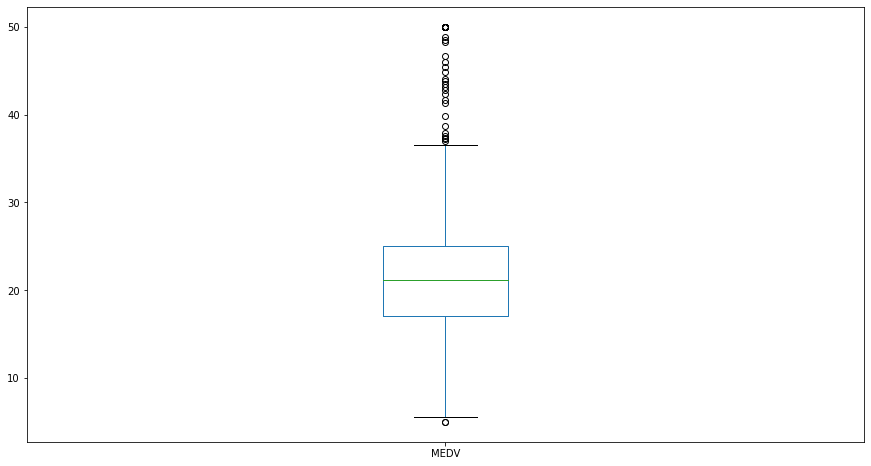

In [41]:

ax1 = b_df['MEDV'].plot.box(figsize=(15,8))


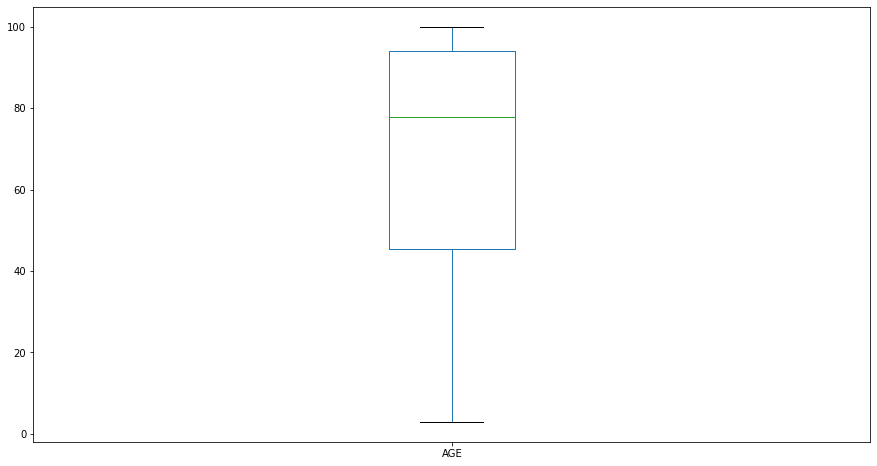

In [42]:

ax2 = b_df['AGE'].plot.box(figsize=(15,8))


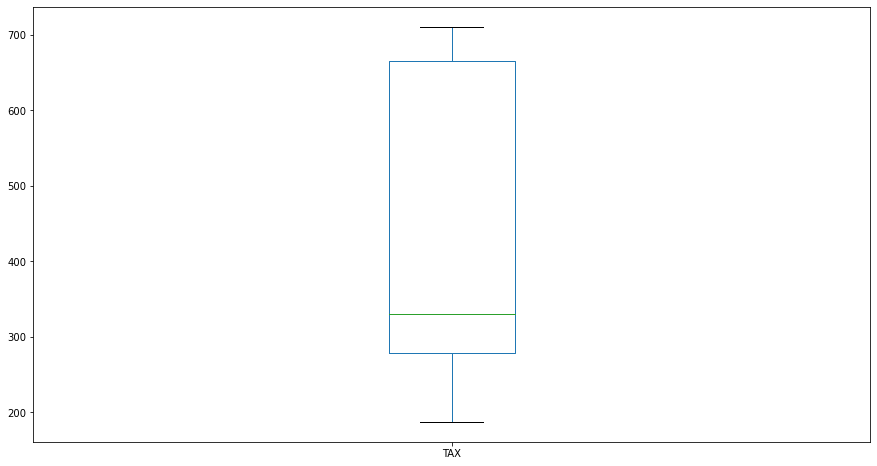

In [43]:
ax3 = b_df['TAX'].plot.box(figsize=(15,8))


no LSTAT column


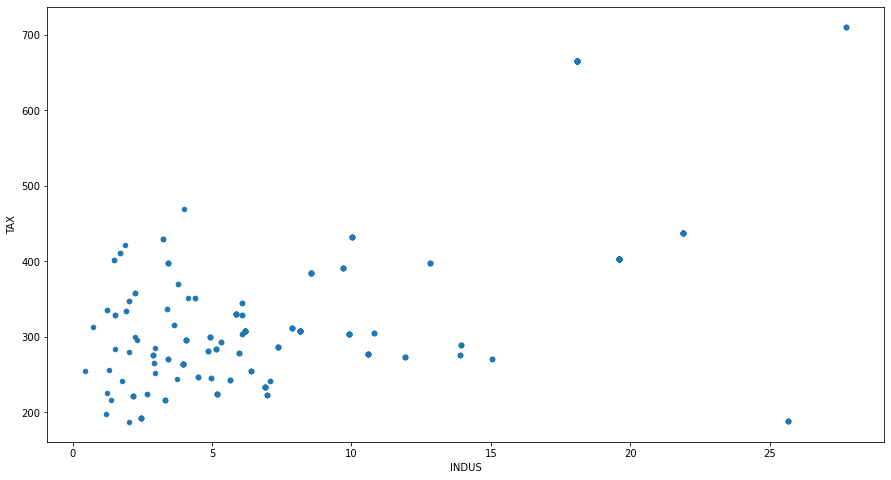

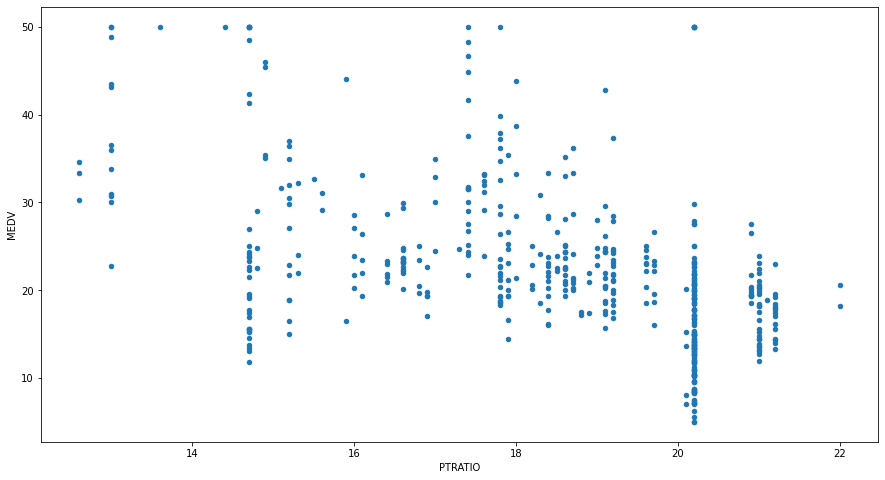

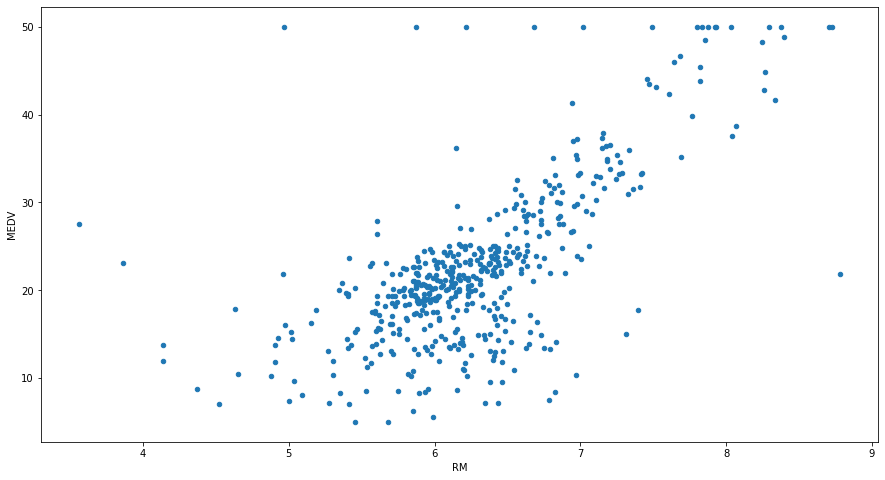

In [57]:
# c. Discover outliers with visualization scatterplot INDUS vs TAX, LSTAT vs MEDV, RM vs MEDV.

ax0 = b_df.plot.scatter(x='INDUS', y='TAX' , figsize=(15,8))

print("no LSTAT column")

ax1 = b_df.plot.scatter(x='PTRATIO', y='MEDV', figsize=(15,8))

ax2 = b_df.plot.scatter(x='RM', y='MEDV', figsize=(15,8))

In [78]:
# d. Use IQR and Z score and Remove all the Outliers.
def find_outlier(df):
    q1=df.quantile(.25)
    q3=df.quantile(.75)
    
    iqr=q3-q1
    min_range = q1 - 1.5*iqr
    max_range = q3 + 1.5*iqr
    outliers_ixs = list(df.index[ (df < min_range) | (df > max_range) ])
    #outliers_ixs = list(df.loc[ (df < min_range) | (df > max_range) ])
    outliers_vals = list(df[outliers_ixs])
    
    return outliers_ixs, outliers_vals

outliers_iqr = list()
outliers_z=list()
threshold= 2

for _c in b_df.columns:
    outliers_iqr.append((_c,np.array(find_outlier(b_df[_c])[0])))

    z= np.abs(zscore(b_df[_c]))
    outliers_ix_z = np.where(z>threshold)
    outliers_z.append((_c, outliers_ix_z))


display(outliers_iqr, outliers_z)




[('CRIM',
  array([  1,  10,  35,  38,  41,  47,  48,  52,  68,  70,  71,  75,  87,
          91,  94, 107, 109, 122, 133, 136, 144, 159, 162, 171, 175, 179,
         185, 190, 193, 209, 215, 218, 221, 223, 234, 240, 254, 258, 269,
         280, 282, 284, 299, 302, 315, 333, 351, 353, 360, 385, 386, 387,
         392,  14,  20,  23,  44,  50,  56,  65,  75,  77,  81,  94,  97,
          98])),
 ('ZN',
  array([  4,   6,   7,  11,  58,  69,  83,  84,  97, 111, 116, 117, 120,
         129, 138, 140, 145, 148, 149, 150, 164, 165, 168, 172, 187, 210,
         214, 230, 273, 277, 289, 291, 293, 298, 310, 311, 319, 320, 328,
         340, 342, 346, 350, 363, 368, 369, 370, 371, 378, 379, 381, 383,
           1,   7,  18,  27,  32,  33,  52,  58,  63,  66,  69,  74,  76,
          90])),
 ('INDUS', array([], dtype=float64)),
 ('NOX', array([], dtype=float64)),
 ('RM',
  array([ 18,  45, 103, 104, 108, 109, 111, 131, 139, 143, 153, 164, 211,
         234, 240, 260, 293, 297, 320, 325, 331, 333

[('CRIM',
  (array([ 10,  41,  52,  75, 133, 144, 190, 209, 215, 234, 240, 258, 280,
          315, 353, 450], dtype=int64),)),
 ('ZN',
  (array([  4,   6,  58,  83,  84, 111, 116, 148, 150, 164, 165, 168, 187,
          210, 214, 291, 293, 310, 311, 319, 320, 328, 340, 346, 350, 363,
          369, 378, 379, 381, 383, 407, 418, 427, 452, 463, 469, 474],
         dtype=int64),)),
 ('INDUS',
  (array([  9,  53,  62,  95,  98, 167, 194, 228, 246, 295, 366, 412],
         dtype=int64),)),
 ('NOX',
  (array([ 14,  51,  60,  81, 125, 216, 220, 248, 316, 317, 344, 374, 393,
          417, 443, 479], dtype=int64),)),
 ('RM',
  (array([ 18,  45, 103, 104, 108, 109, 111, 131, 139, 143, 153, 164, 211,
          234, 240, 260, 287, 293, 297, 320, 325, 331, 333, 334, 384, 385,
          386, 389, 392, 413, 434], dtype=int64),)),
 ('AGE',
  (array([  2,  16, 106, 165, 239, 252, 259, 271, 330, 379, 388, 399, 434,
          462], dtype=int64),)),
 ('DIS',
  (array([  6,  58, 147, 148, 149, 187, 210, 

In [100]:
# e. Replace Outliers with Null values. Replacing outliers by Mean, Median.
for _c, _ixs in outliers_iqr:
    b_df[_c].iloc[_ixs]=np.nan
    
display(b_df.isna().sum())

for _c, _ixs in outliers_z:
    b_df[_c].iloc[_ixs]=np.nan
    
display(b_df.isna().sum())

for _c in b_df.columns:
    _m = np.nanmedian(b_df[_c])
    b_df[_c] = b_df[_c].fillna(_m)
    
    
display(b_df.isna().sum())

CRIM       65
ZN         70
INDUS      12
NOX        16
RM         33
AGE        14
DIS        23
TAX         0
PTRATIO    17
MEDV       42
dtype: int64

CRIM       65
ZN         70
INDUS      12
NOX        16
RM         33
AGE        14
DIS        23
TAX         0
PTRATIO    17
MEDV       42
dtype: int64

0.18337
0.0
8.56
0.532
6.176
79.2
3.0334
330.0
19.1
20.6


CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
MEDV       0
dtype: int64